In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
df=pd.read_excel('Dataset_w6.xlsx')

In [3]:
df.head()

,country,Region,Surface area (km2),Population in thousands (2017),GDP per capita (current US$),Agricultural production index,International trade: Imports (million US$)
0,Afghanistan,SouthernAsia,652864.0,35530.0,623.2,125.0,3568.0
1,Albania,SouthernEurope,28748.0,2930.0,3984.2,134.0,4669.0
2,Algeria,NorthernAfrica,2381741.0,41318.0,4154.1,160.0,47091.0
3,Angola,MiddleAfrica,1246700.0,29784.0,4714.1,175.0,8790.0
4,Antigua and Barbuda,Caribbean,442.0,102.0,14764.5,88.0,491.0


In [4]:
df.columns

Index(['country', 'Region', 'Surface area (km2)',
       'Population in thousands (2017)', 'GDP per capita (current US$)',
       'Agricultural production index ',
       'International trade: Imports (million US$)'],
      dtype='object')

# 1. Find out how many countries are there in the dataset.

In [5]:
df.country.count()

196

# 2. Find out how many countries with respect to the region are available in the dataset

In [6]:
df.Region.value_counts()

WesternAsia          18
EasternAfrica        17
Caribbean            16
WesternAfrica        15
SouthAmerica         12
SouthernEurope       12
South-easternAsia    11
EasternEurope        10
NorthernEurope       10
SouthernAsia          9
MiddleAfrica          9
CentralAmerica        8
WesternEurope         7
EasternAsia           7
SouthernAfrica        5
Polynesia             5
NorthernAfrica        5
Melanesia             5
CentralAsia           5
NorthernAmerica       4
Micronesia            4
Oceania               2
Name: Region, dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

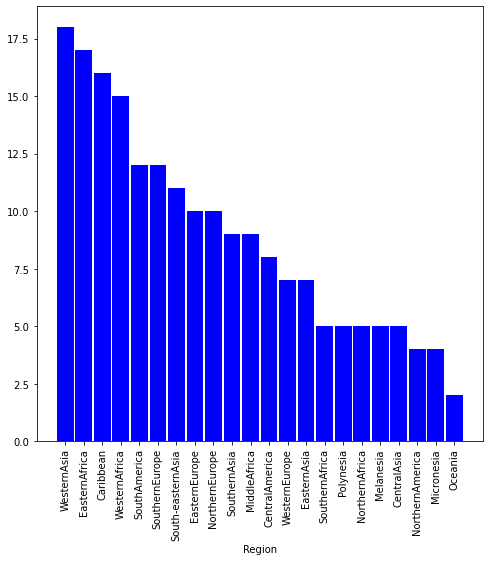

In [22]:
reg_cntry=df.Region.value_counts()
reg_cntry=dict(reg_cntry)
region=list(reg_cntry.keys())
cntry_count=list(reg_cntry.values())
plt.figure(figsize=(8,8))
plt.bar(region,cntry_count,color='b',width=.9)
plt.xlabel('Region')
plt.xticks(rotation=90)

# 3. On average which region has the highest

# a. GDP per capita (current US$)

<AxesSubplot:title={'center':'Avarage of gdp over Regions'}, xlabel='Region'>

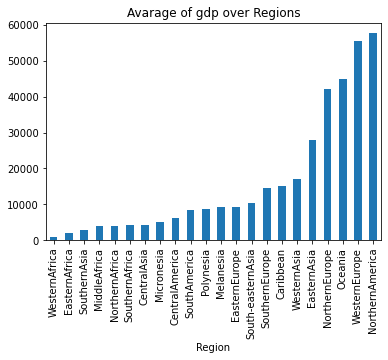

In [7]:
df.groupby('Region')['GDP per capita (current US$)'].mean().sort_values().plot(kind='bar',x='Region',y='GDP per capita (current US$)',title='Avarage of gdp over Regions')

Northern America has highest GDP per capita

# b. International trade: Imports (million US$)

In [8]:
df1=df.groupby('Region',as_index=False)['International trade: Imports (million US$)'].mean()

In [10]:
statistics.mean(df['International trade: Imports (million US$)'])

79961.38265306123

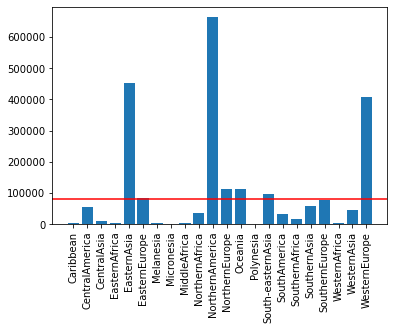

In [11]:
plt.figure()
plt.bar(df1['Region'],df1['International trade: Imports (million US$)'])
plt.xticks(rotation=90)
plt.axhline(79961.38265306123,color='red')

Nortern america has highest international trades. the red line shows the average of entire regions

# 4. Find out which region has more consistent with respect to GDP per capita(current US$)

In [12]:
cons_gdp=df.groupby('Region')['GDP per capita (current US$)'].std()

In [13]:
cons_gdp

Region
Caribbean            14579.371326
CentralAmerica        4180.440883
CentralAsia           4152.215490
EasternAfrica         3716.131770
EasternAsia          27485.120923
EasternEurope         5415.488739
Melanesia            13855.842686
Micronesia            4820.669694
MiddleAfrica          5274.846281
NorthernAfrica         974.706575
NorthernAmerica      25749.619445
NorthernEurope       20671.030185
Oceania               9233.329638
Polynesia             6956.250286
South-easternAsia    16311.810656
SouthAmerica          4273.707394
SouthernAfrica        2177.551120
SouthernAsia          2855.708179
SouthernEurope        9541.703216
WesternAfrica          815.095399
WesternAsia          18812.151459
WesternEurope        24770.467728
Name: GDP per capita (current US$), dtype: float64

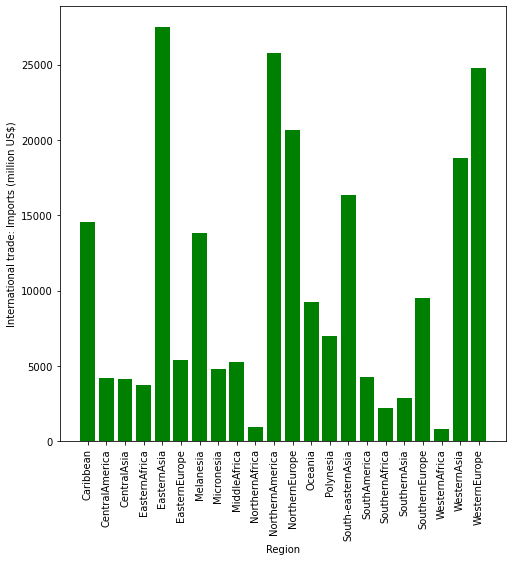

In [14]:
cons_gdp=dict(cons_gdp)
region_gdp=list(cons_gdp.keys())
values_gdp=list(cons_gdp.values())
plt.figure(figsize=(8,8))
plt.bar(region_gdp,values_gdp,color ='g',width = 0.8)
plt.xlabel("Region")
plt.xticks(rotation='vertical')
plt.ylabel("International trade: Imports (million US$)")
plt.show()

Western africa has less deviation in GDP per capita